## **Question 1**

1. Data Collection
2. Data Cleaning
3. Data Analysis


In [2]:
import os

# Define the folder structure
base_dir = "Assignment1"
folders = ['DataCollection', 'DataCleaning', 'Analysis',
            'Analysis/Visualizations']

# Create the directories
for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Folder structure created successfully!")

Folder structure created successfully!


### **1. Data Collection**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Example frailty data (you would normally load this from a CSV or dataset)
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Grip_strength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

# Convert to DataFrame
df_frailty = pd.DataFrame(data)
df_frailty.head()

,Height,Weight,Age,Grip_strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [6]:
# Create folder structure
os.makedirs('Assignment1/DataCollection/RawData', exist_ok=True)

# Save the raw data as a CSV file in the DataCollection/RawData folder
df_frailty.to_csv('Assignment1/DataCollection/RawData/frailty_data.csv', index=False)

### **2. Data Cleaning**

### **Missing Values**

In [7]:
df_frailty.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip_strength,0
Frailty,0


**We can see that there are no missing values in our dataset.**

### **Datatypes**

In [8]:
df_frailty.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip_strength,int64
Frailty,object


We can see that the frailty column is a categorical feature. Let's label encode it to convert it into numerical feature

In [9]:
# Encode the categorical variable 'Frailty' (0 for 'N', 1 for 'Y')
df_frailty['Frailty'] = df_frailty['Frailty'].map({'N': 0, 'Y': 1})

df_frailty.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip_strength,int64
Frailty,int64


In [10]:
#Null Values
df_frailty.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip_strength,0
Frailty,0


## **Save the processed data**

In [11]:
# Create the directory
os.makedirs('Assignment1/DataCleaning/ProcessedData', exist_ok=True)

# Save the processed data
df_frailty.to_csv('Assignment1/DataCleaning/ProcessedData/cleaned_frailty_data.csv', index=False)

### **3. Data Visualization**

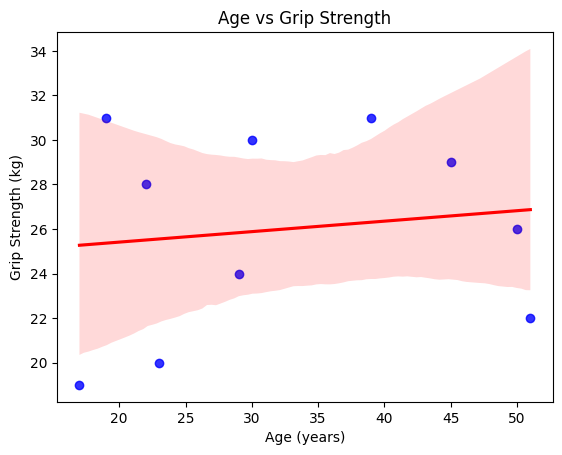

<Figure size 640x480 with 0 Axes>

In [16]:
# Scatter plot with regression line for Age vs Grip Strength
sns.regplot(x='Age', y='Grip_strength', data=df_frailty, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Age vs Grip Strength')
plt.xlabel('Age (years)')
plt.ylabel('Grip Strength (kg)')
plt.show()

# Save the visualization
plt.savefig('Assignment2/Frailty/Analysis/Visualizations/age_vs_grip_strength_regression.png')

<ipython-input-17-fdb75ae3d38c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_frailty['Weight'], shade=True, color='green')


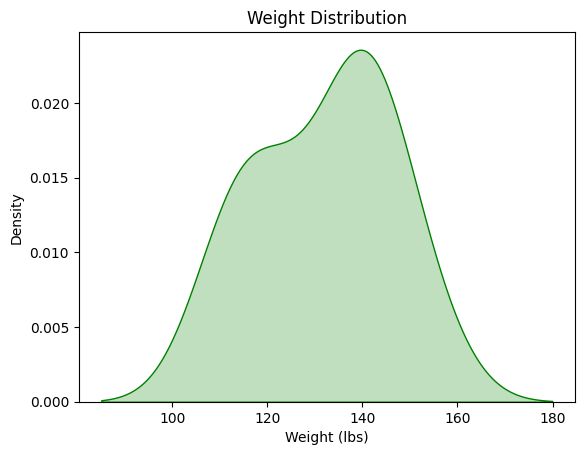

<Figure size 640x480 with 0 Axes>

In [17]:
# KDE plot for weight distribution
sns.kdeplot(df_frailty['Weight'], shade=True, color='green')
plt.title('Weight Distribution')
plt.xlabel('Weight (lbs)')
plt.ylabel('Density')
plt.show()

# Save the visualization
plt.savefig('Assignment2/Frailty/Analysis/Visualizations/weight_distribution_kde.png')

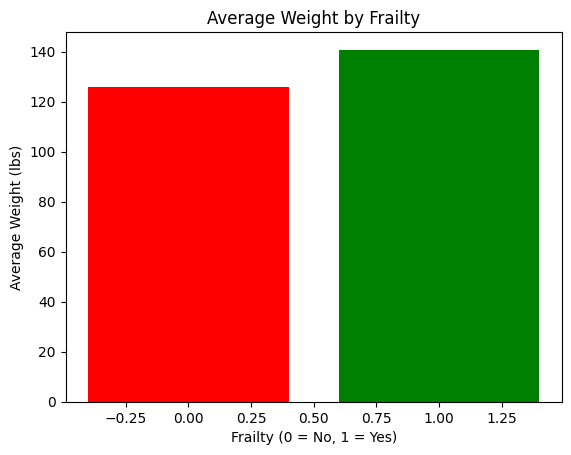

In [19]:
# Bar plot for average weight by frailty
frailty_group = df_frailty.groupby('Frailty')['Weight'].mean().reset_index()

plt.bar(frailty_group['Frailty'], frailty_group['Weight'], color=['red', 'green'])
plt.title('Average Weight by Frailty')
plt.xlabel('Frailty (0 = No, 1 = Yes)')
plt.ylabel('Average Weight (lbs)')

# Save the visualization
plt.savefig('Assignment1/Analysis/Visualizations/weight_by_frailty.png')
plt.show()


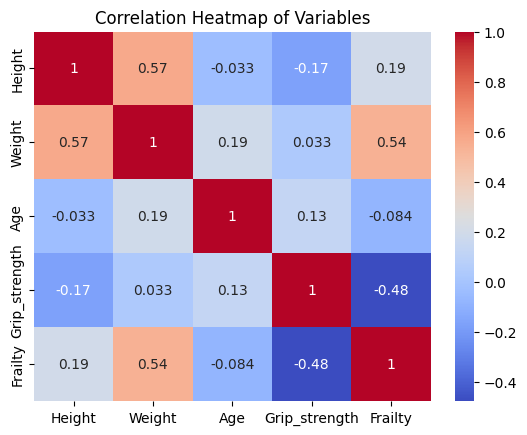

In [20]:
# Correlation matrix heatmap
correlation_matrix = df_frailty.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')

# Save the visualization
plt.savefig('Assignment1/Analysis/Visualizations/correlation_heatmap.png')
plt.show()
